In [191]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [192]:

dataset_dir = "/kaggle/input/the-birds"

In [193]:
batch_size = 10
img_height = 224
img_width = 224

In [194]:
train_ds = tf.keras.utils.image_dataset_from_directory(
dataset_dir,
validation_split=0.2,
subset="training",
seed=48,
image_size=(img_height, img_width),
batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
dataset_dir,
validation_split=0.1,
subset="validation",
seed=48,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 811 files belonging to 6 classes.
Using 649 files for training.
Found 811 files belonging to 6 classes.
Using 81 files for validation.


In [195]:
class_names = train_ds.class_names
class_names

['AMERICAN GOLDFINCH',
 'BARN OWL',
 'CARMINE BEE-EATER',
 'DOWNY WOODPECKER',
 'EMPEROR PENGUIN',
 'FLAMINGO']

In [196]:
model = models.Sequential([
layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(20, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(20, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(32, activation='relu'),
layers.Dense(128, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(len(class_names), activation='softmax')
])

In [197]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [198]:
model.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_34 (Rescaling)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 222, 222, 20)   │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 111, 111, 20)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 109, 109, 20)   │         3,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 54, 54, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_34 (Flatten)            │ (None, 58320)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 32)             │     1,866,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,879,002 (7.17 MB)

 Trainable params: 1,879,002 (7.17 MB)

 Non-trainable params: 0 (0.00 B)

In [199]:
epochs = 15
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)

Epoch 1/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.2618 - loss: 1.8138 - val_accuracy: 0.6049 - val_loss: 1.1172
Epoch 2/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7173 - loss: 0.7972 - val_accuracy: 0.8395 - val_loss: 0.4959
Epoch 3/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8988 - loss: 0.2726 - val_accuracy: 0.7654 - val_loss: 0.6800
Epoch 4/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9603 - loss: 0.1243 - val_accuracy: 0.8025 - val_loss: 0.5934
Epoch 5/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9664 - loss: 0.0960 - val_accuracy: 0.8519 - val_loss: 0.4034
Epoch 6/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9830 - loss: 0.0631 - val_accuracy: 0.8148 - val_loss: 0.9498
Epoch 7/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9884 - loss: 0.0369 - val_accuracy: 0.7901 - val_loss: 0.7622
Epoch 8/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.8025 - val_lo

In [200]:
model.evaluate(val_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8174 - loss: 0.7146 


[0.7096722722053528, 0.8395061492919922]

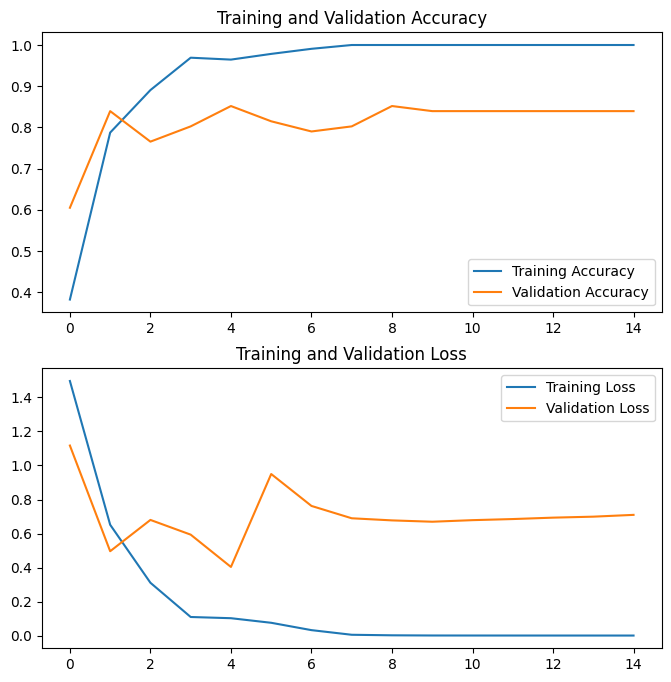

Maximum Validation Accuracy: 0.8518518805503845


In [201]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Display the maximum validation accuracy
print("Maximum Validation Accuracy:", max(val_acc))

In [202]:
plt.show()

In [203]:
print("Maximum Validation Accuracy:", max(val_acc))

Maximum Validation Accuracy: 0.8518518805503845
